In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.pylab as pylab
import seaborn as sns

# Cause plots to be displayed in the notebook:
%pylab inline
%matplotlib inline

# Override default figure sizing:
#pylab.rcParams['figure.figsize'] = (10, 6)
sns.set(color_codes = True)

Populating the interactive namespace from numpy and matplotlib


In [2]:
missing_values=["n/a","na","--","?"]
df=pd.read_csv('../../dataproject/train.csv', na_values=missing_values)

In [3]:
df['date']=pd.to_datetime(df['date'])

In [17]:
df.head()


,date,store,item,sales
0,2013-01-01,1,1,13
1,2013-01-02,1,1,11
2,2013-01-03,1,1,14
3,2013-01-04,1,1,13
4,2013-01-05,1,1,10


In [60]:
df.isnull().sum()

date     0
store    0
item     0
sales    0
dtype: int64

In [64]:
print("Data from {} to {}".format(df['date'].min(), df['date'].max()))
print("Number of samples: {}".format(len(df)))
print("Stores: {}".format(df['store'].unique().tolist()))
print("Different items: {}".format(df['item'].unique()))

Data from 2013-01-01 00:00:00 to 2017-12-31 00:00:00
Number of samples: 913000
Stores: [1, 2, 3, 4, 5, 6, 7, 8, 9, 10]
Different items: [ 1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24
 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47 48
 49 50]


In [18]:
df_store1 =df[(df['store']==1)&(df['item']==1)]
#df_store1

In [19]:
timeseries_columns = ['date','sales']
ts_store1=df_store1[timeseries_columns]
ts_store1=ts_store1.set_index('date')
#ts_store1

Text(0.5, 1.0, 'Distribution of Response Variable')

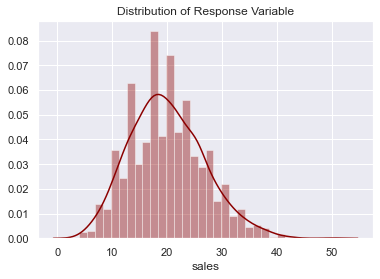

In [40]:
sns.distplot(ts_store1['sales'], color='darkred').set_title('Distribution of Response Variable')

In [81]:
Sales_year=ts_store1.groupby(pd.Grouper(freq='Y'))['sales'].sum()
Sales_year=pd.DataFrame(Sales_year)
Sales_year=Sales_year.reset_index()
Sales_year
#Sales_year= Sales_year.reset_index(inplace=True)
#Sales_year

,date,sales
0,2013-12-31,6025
1,2014-12-31,6889
2,2015-12-31,7507
3,2016-12-31,7950
4,2017-12-31,8097


In [87]:
Sales_year['year'] = pd.DatetimeIndex(Sales_year['date']).year
Sales_year.head()

,date,sales,year
0,2013-12-31,6025,2013
1,2014-12-31,6889,2014
2,2015-12-31,7507,2015
3,2016-12-31,7950,2016
4,2017-12-31,8097,2017


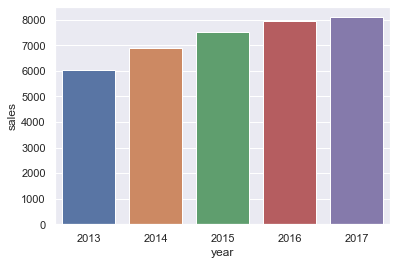

In [88]:
ax = sns.barplot(x="year", y="sales", data=Sales_year)
#ax.set_xticklabels(ax.get_xticklabels(), rotation=45)


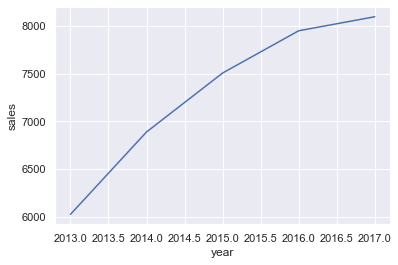

In [89]:
sns.lineplot(x="year", y="sales",data=Sales_year)

Text(0, 0.5, 'sales')

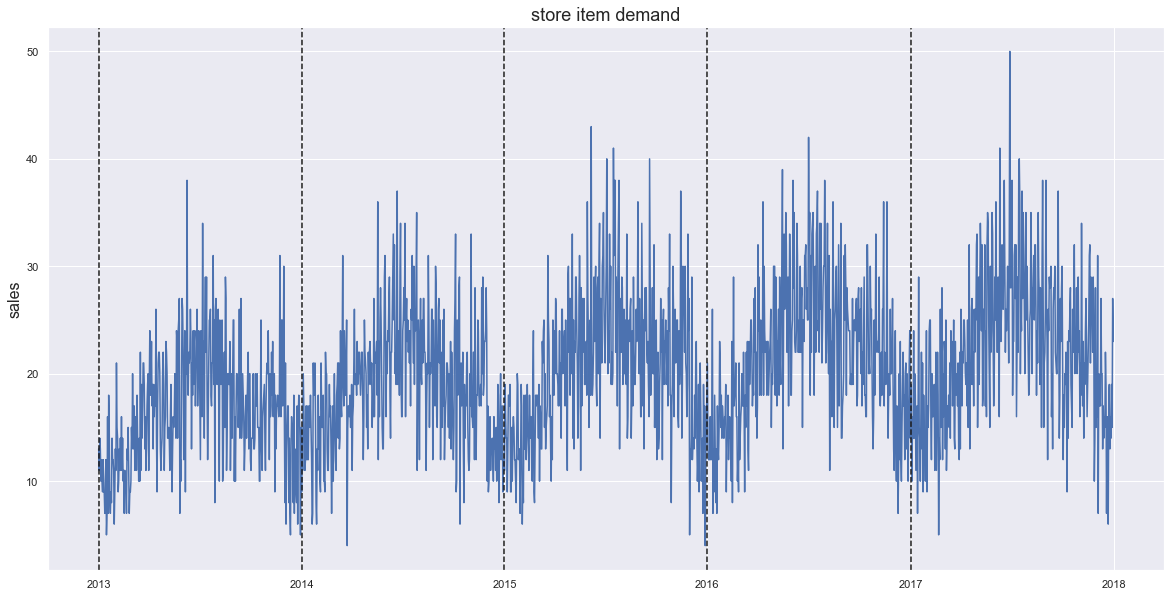

In [6]:
plt.figure(figsize = (20,10))
plt.plot(ts_store1)
for year in range(2013,2018):
    plt.axvline(pd.to_datetime(str(year)+'-01-01'), color='k', linestyle='--')
plt.title('store item demand', fontsize = 18)
plt.ylabel('sales', fontsize = 16)

In [ ]:
X = ts_store1['sales'].values
len(X)

In [30]:
X = ts_store1['sales'].values
split = 913
X1, X2 = X[0:split], X[split:]
mean1, mean2 = X1.mean(), X2.mean()
var1, var2 = X1.var(), X2.var()
print('mean1=%f, mean2=%f' % (mean1, mean2))
print('variance1=%f, variance2=%f' % (var1, var2))

mean1=18.018620, mean2=21.924425
variance1=36.364385, variance2=46.840948


In [33]:
from statsmodels.tsa.stattools import adfuller

X = ts_store1['sales'].values
result = adfuller(X)
print('ADF Statistic: %f' % result[0])
print('p-value: %f' % result[1])
print('Critical Values:')
for key, value in result[4].items():
    print('\t%s: %.3f' % (key, value))

ADF Statistic: -3.157671
p-value: 0.022569
Critical Values:
	1%: -3.434
	5%: -2.863
	10%: -2.568


In [41]:
## Difference the series to make it stationary

Text(0, 0.5, 'sales')

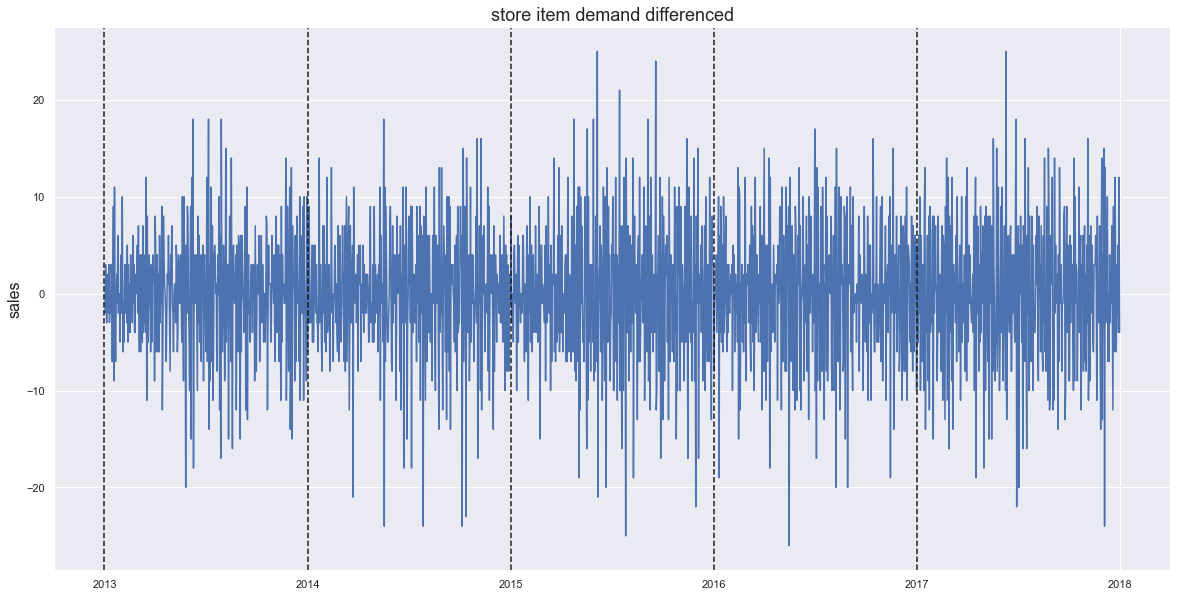

In [59]:
plt.figure(figsize = (20,10))
plt.plot(ts_store1.diff().dropna(inplace = False))
for year in range(2013,2018):
    plt.axvline(pd.to_datetime(str(year)+'-01-01'), color='k', linestyle='--')
plt.title('store item demand differenced', fontsize = 18)
plt.ylabel('sales', fontsize = 16)

## Seasonal decomposition

In [22]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
from statsmodels.tsa.seasonal import seasonal_decompose 

<Figure size 2880x1080 with 0 Axes>

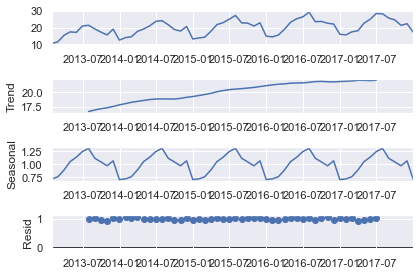

In [92]:
plt.figure(figsize = (40,15))
decomposition = seasonal_decompose(ts_store1.groupby(pd.Grouper(freq='M')).mean(),model='multiplicative')
decomposition.plot()
plt.show()

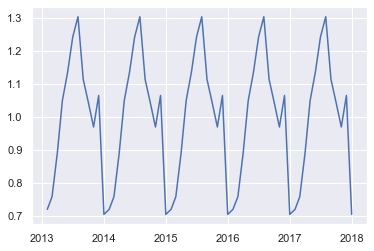

In [44]:
Seasonal1=decomposition.seasonal
plt.plot(Seasonal1)

In [65]:
seasonaldf=pd.DataFrame(Seasonal1)
seasonaldf.to_csv('seasonal_monthly_pattern.csv')

<Figure size 1440x1080 with 0 Axes>

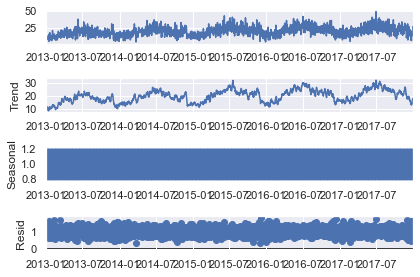

In [67]:
plt.figure(figsize = (20,15))
decomposition2 = seasonal_decompose(ts_store1.groupby(pd.Grouper(freq='W')).mean(),model='multiplicative')
decomposition2.plot()
plt.show()

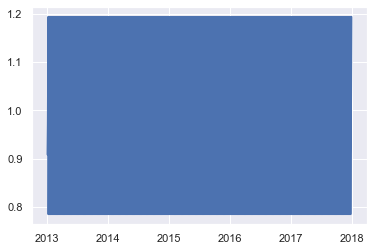

In [68]:
Seasonal2=decomposition2.seasonal
plt.plot(Seasonal2)

In [69]:
seasonaldf2=pd.DataFrame(Seasonal2)
seasonaldf2
#seasonaldf2.to_csv('seasonal_weekly_pattern.csv')

,seasonal
date,
2013-01-01,0.908022
2013-01-02,0.943713
2013-01-03,0.972412
2013-01-04,1.054246
2013-01-05,1.143599
...,...
2017-12-27,0.943713
2017-12-28,0.972412
2017-12-29,1.054246


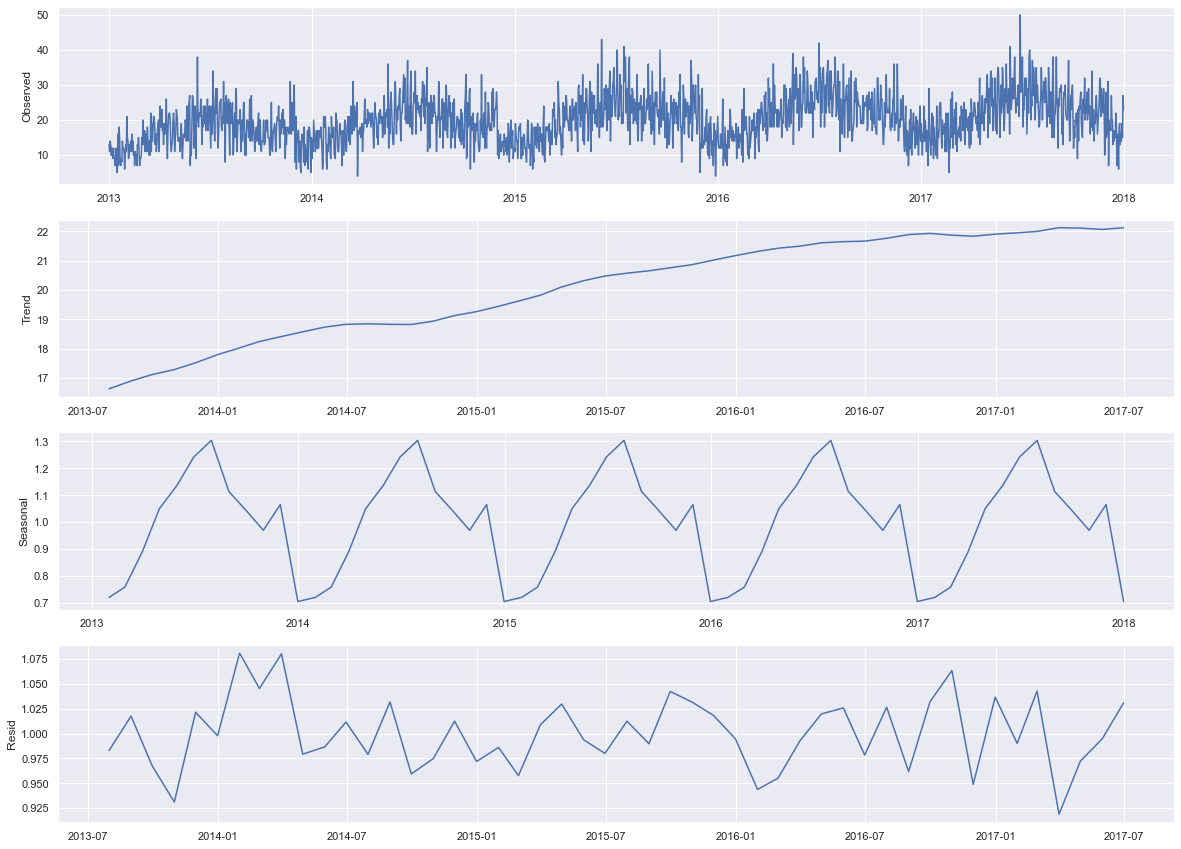

In [93]:
decomp = seasonal_decompose(ts_store1.groupby(pd.Grouper(freq='M')).mean(),model='multiplicative')
trend = decomp.trend
seasonal = decomp.seasonal
resid = decomp.resid

plt.figure(figsize = (20,15))
plt.subplot(411)
plt.plot(ts_store1)
plt.ylabel('Observed', fontsize = 12)
plt.subplot(412)
plt.plot(trend)
plt.ylabel('Trend', fontsize = 12)
plt.subplot(413)
plt.plot(seasonal)
plt.ylabel('Seasonal', fontsize = 12)
plt.subplot(414)
plt.plot(resid)
plt.ylabel('Resid', fontsize = 12)
plt.show()

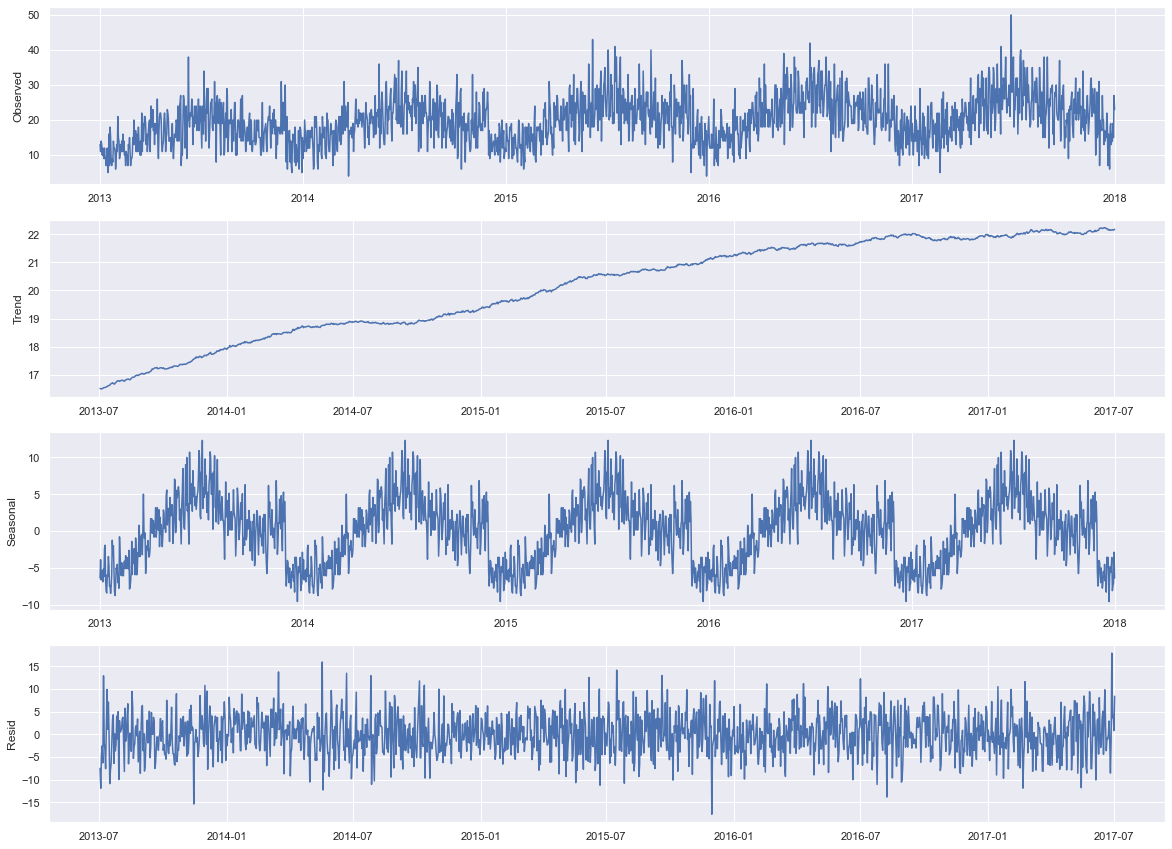

In [47]:
decomp = seasonal_decompose(ts_store1, period = 365)
trend = decomp.trend
seasonal = decomp.seasonal
resid = decomp.resid

plt.figure(figsize = (20,15))
plt.subplot(411)
plt.plot(ts_store1)
plt.ylabel('Observed', fontsize = 12)
plt.subplot(412)
plt.plot(trend)
plt.ylabel('Trend', fontsize = 12)
plt.subplot(413)
plt.plot(seasonal)
plt.ylabel('Seasonal', fontsize = 12)
plt.subplot(414)
plt.plot(resid)
plt.ylabel('Resid', fontsize = 12)
plt.show()

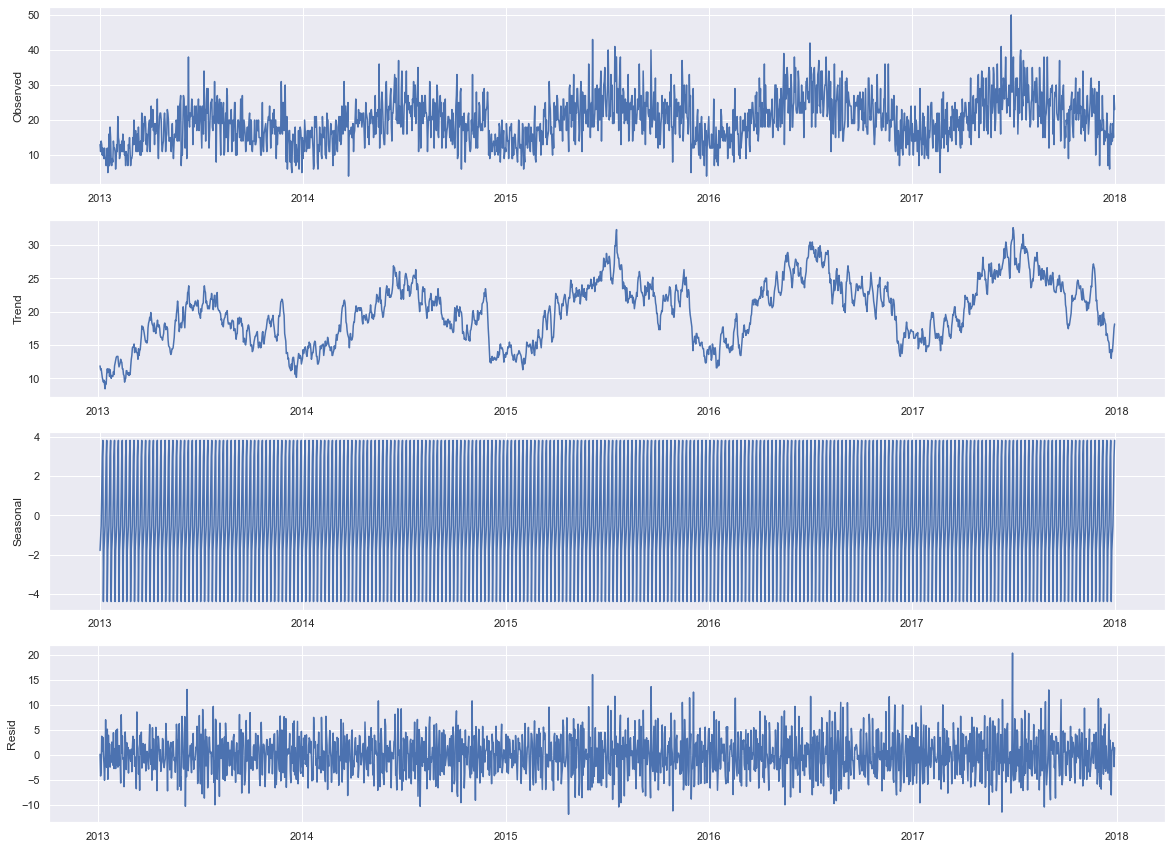

In [48]:
decomp = seasonal_decompose(ts_store1, period = 7)
trend_w = decomp.trend
seasonal_w = decomp.seasonal
resid_w = decomp.resid

plt.figure(figsize = (20,15))
plt.subplot(411)
plt.plot(ts_store1)
plt.ylabel('Observed', fontsize = 12)
plt.subplot(412)
plt.plot(trend_w)
plt.ylabel('Trend', fontsize = 12)
plt.subplot(413)
plt.plot(seasonal_w)
plt.ylabel('Seasonal', fontsize = 12)
plt.subplot(414)
plt.plot(resid_w)
plt.ylabel('Resid', fontsize = 12)
plt.show()

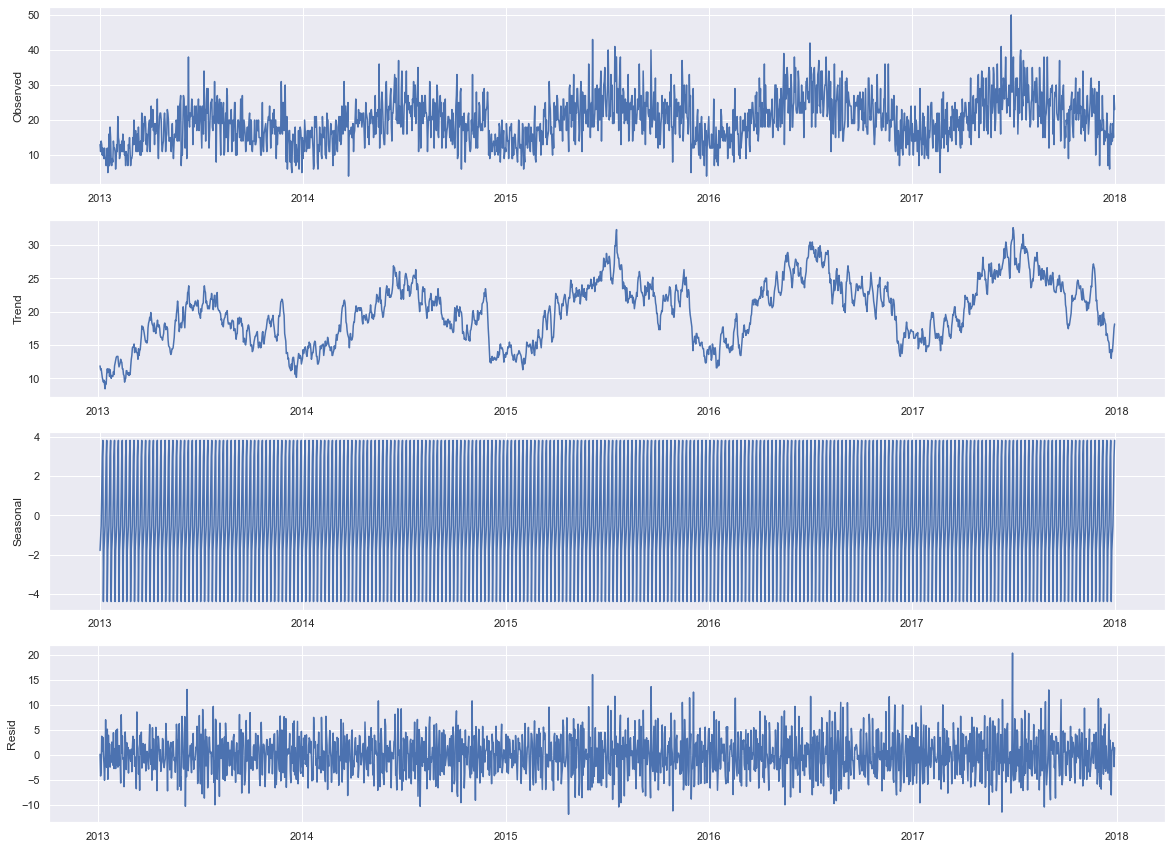

In [49]:
decomp_m = seasonal_decompose(ts_store1, period = 30)
trend_m = decomp.trend
seasonal_m = decomp.seasonal
resid_m = decomp.resid

plt.figure(figsize = (20,15))
plt.subplot(411)
plt.plot(ts_store1)
plt.ylabel('Observed', fontsize = 12)
plt.subplot(412)
plt.plot(trend_m)
plt.ylabel('Trend', fontsize = 12)
plt.subplot(413)
plt.plot(seasonal_m)
plt.ylabel('Seasonal', fontsize = 12)
plt.subplot(414)
plt.plot(resid_m)
plt.ylabel('Resid', fontsize = 12)
plt.show()

In [57]:
xticks=pd.DatetimeIndex(ts_store1.index).month

In [58]:
xticks

Int64Index([ 1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
            ...
            12, 12, 12, 12, 12, 12, 12, 12, 12, 12],
           dtype='int64', name='date', length=1826)

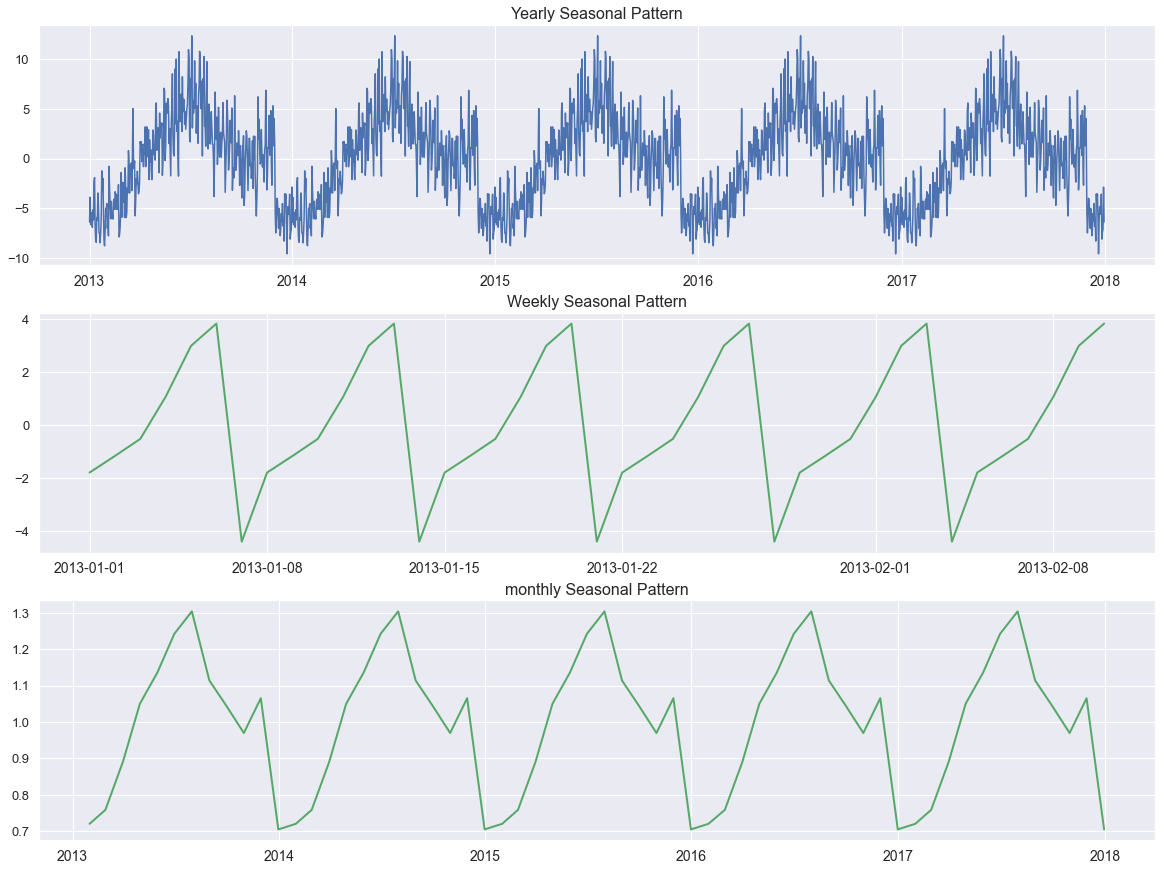

In [62]:
plt.figure(figsize = (20,15))
plt.subplot(311)
plt.plot(seasonal)
plt.title('Yearly Seasonal Pattern', fontsize = 16)
plt.xticks(fontsize=14)
plt.yticks(fontsize=13)
plt.subplot(312)
plt.plot(seasonal_w.iloc[:41], color = 'g', linewidth = 2)## 7*6=42
plt.xticks(fontsize=14)
plt.yticks(fontsize=13)
plt.title('Weekly Seasonal Pattern', fontsize = 16)
plt.subplot(313)
plt.plot(Seasonal1, color = 'g', linewidth = 2)
plt.xticks(fontsize=14)
plt.yticks(fontsize=13)
plt.title('monthly Seasonal Pattern', fontsize = 16)


plt.show()

Data Contains yearly, monthly and weekly seasonality

In [32]:
train = ts_store1.iloc[:len(ts_store1)-92] 
test = ts_store1.iloc[len(ts_store1)-92:] # set 3 months(92 days)) for testing

### ARIMA Model

#### Autocorrelation and Partial Autocorrelation

Autocorrelation: is used to find repetitive patterns or periodic signal in time series.

In [33]:
from statsmodels.graphics.tsaplots import plot_acf
from statsmodels.graphics.tsaplots import plot_pacf

Text(0.5, 0, 'Lag (Days)')

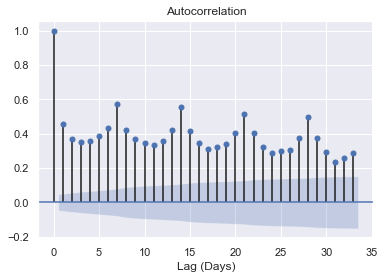

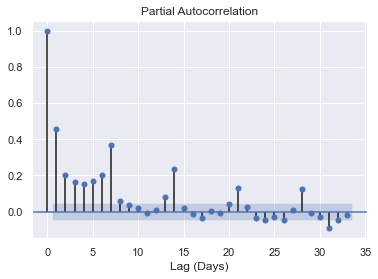

In [34]:
# Plotting autocorrelation function
plot_acf(train)
plt.xlabel('Lag (Days)',)
plot_pacf(train)
plt.xlabel('Lag (Days)')

From the ACF we can see there is a peak at 7 lag so we can say seasonal component repeats every 7 time steps

Text(0.5, 0, 'Lag (Days)')

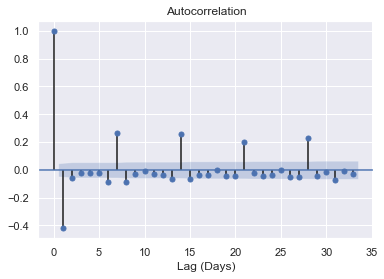

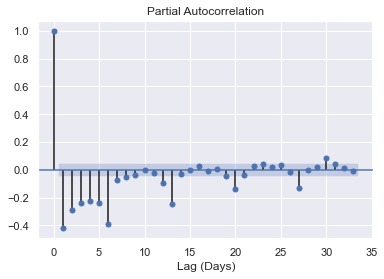

In [49]:
# Plotting autocorrelation function with one differencing
plot_acf(train.diff().dropna(inplace = False))
plt.xlabel('Lag (Days)')
plot_pacf(train.diff().dropna(inplace = False))
plt.xlabel('Lag (Days)')

we started with p=1, q=1, d=0 (because Dickey-Fuller Test) but it looks like we need to difference it so the next guess it is 1,1,1
ACF helps to identify the MA order (q=1)
PACF helps to identify the AR order (q=1)

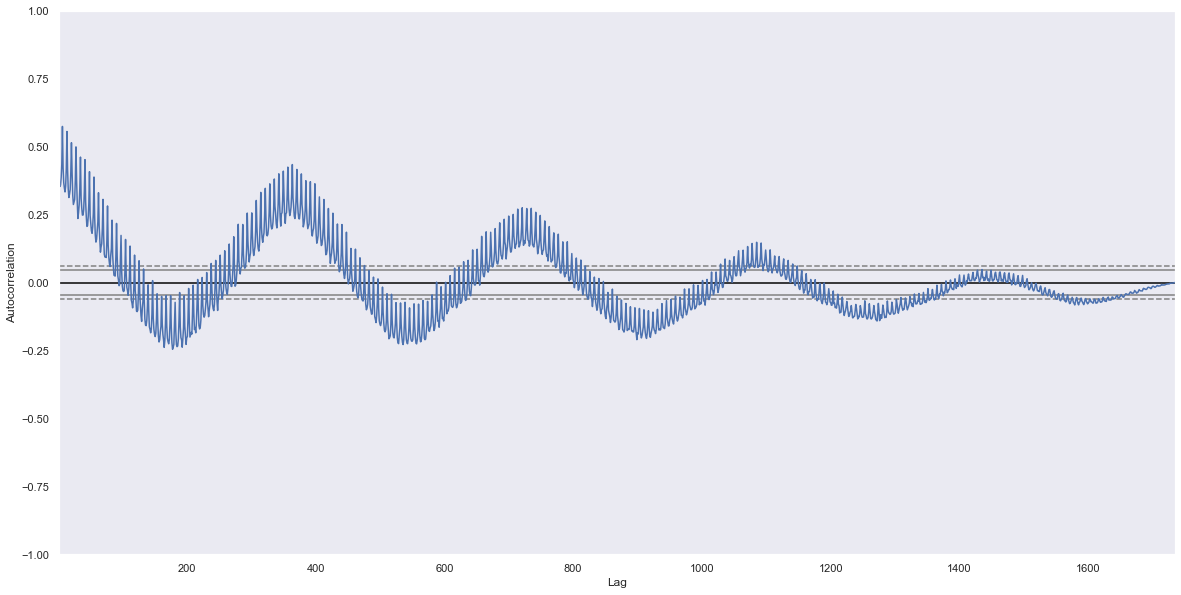

In [65]:
plt.figure(figsize=[20,10])
from pandas.plotting import autocorrelation_plot
from matplotlib import pyplot
autocorrelation_plot(train)
pyplot.show()

In [37]:
from statsmodels.tsa.statespace.sarimax import SARIMAX
import itertools

In [41]:
#Create empty list to store search results
order_aic=[]
# Loop over p values
for p in range(7):
    for q in range(7):
        model=SARIMAX(train, order=(p,1,q))
        results=model.fit()
        #Append order and results tuple
        order_aic.append((p,q,results.aic, results.bic))      


C:\Users\monic\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:159: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  warnings.warn('No frequency information was'
C:\Users\monic\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:159: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  warnings.warn('No frequency information was'
C:\Users\monic\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:159: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  warnings.warn('No frequency information was'
C:\Users\monic\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:159: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  warnings.warn('No frequency information was'
C:\Users\monic\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:159: ValueWarning: No frequency information

C:\Users\monic\Anaconda3\lib\site-packages\statsmodels\base\model.py:567: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warn("Maximum Likelihood optimization failed to converge. "
C:\Users\monic\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:159: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  warnings.warn('No frequency information was'
C:\Users\monic\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:159: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  warnings.warn('No frequency information was'
C:\Users\monic\Anaconda3\lib\site-packages\statsmodels\base\model.py:567: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warn("Maximum Likelihood optimization failed to converge. "
C:\Users\monic\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:159: ValueWarning: No frequency

C:\Users\monic\Anaconda3\lib\site-packages\statsmodels\base\model.py:567: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warn("Maximum Likelihood optimization failed to converge. "
C:\Users\monic\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:159: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  warnings.warn('No frequency information was'
C:\Users\monic\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:159: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  warnings.warn('No frequency information was'
C:\Users\monic\Anaconda3\lib\site-packages\statsmodels\base\model.py:567: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warn("Maximum Likelihood optimization failed to converge. "
C:\Users\monic\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:159: ValueWarning: No frequency

C:\Users\monic\Anaconda3\lib\site-packages\statsmodels\base\model.py:567: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warn("Maximum Likelihood optimization failed to converge. "


In [42]:
order_df = pd.DataFrame(order_aic,columns=['p','q','AIC','BIC'])
print(order_df.sort_values('AIC'))

    p  q           AIC           BIC
47  6  5  10437.953200  10503.444511
33  4  5  10469.609624  10524.185717
48  6  6  10485.730685  10556.679606
38  5  3  10497.890738  10547.009221
39  5  4  10499.552425  10554.128518
27  3  6  10500.480471  10555.056564
40  5  5  10503.179587  10563.213289
17  2  3  10504.178841  10536.924496
34  4  6  10504.295294  10564.328996
41  5  6  10507.793558  10573.284869
20  2  6  10508.150775  10557.269258
26  3  5  10510.015409  10559.133893
32  4  4  10510.172792  10559.291275
25  3  4  10510.952873  10554.613747
24  3  3  10513.837825  10552.041090
18  2  4  10516.802275  10555.005540
45  6  3  10586.858352  10641.434445
46  6  4  10593.663629  10653.697331
44  6  2  10626.295546  10675.414030
43  6  1  10629.295626  10672.956500
42  6  0  10640.133782  10678.337047
37  5  2  10686.127319  10729.788193
36  5  1  10687.006037  10725.209302
31  4  3  10700.171271  10743.832146
23  3  2  10707.732546  10740.478202
29  4  1  10707.912032  10740.657687
1

In [ ]:
As we have seasonal orders it's better to use pmdarima to find the best model

In [46]:
from pmdarima import auto_arima 
  
# Ignore warnings 
import warnings 
warnings.filterwarnings("ignore") 
  
# Fit auto_arima function to dataset 
model1 = auto_arima(train, start_p=1,start_q=1, max_p=7, max_q=7,
                    seasonal =True,m=7, suppress_warnings=True, information_criterion='aic', trace=True, error_action= 'ignore')            
  
# To print the summary 
model1.summary() 

Performing stepwise search to minimize aic
 ARIMA(1,1,1)(1,0,1)[7] intercept   : AIC=inf, Time=3.08 sec
 ARIMA(0,1,0)(0,0,0)[7] intercept   : AIC=11699.312, Time=0.05 sec
 ARIMA(1,1,0)(1,0,0)[7] intercept   : AIC=11207.039, Time=0.50 sec
 ARIMA(0,1,1)(0,0,1)[7] intercept   : AIC=10659.514, Time=0.62 sec
 ARIMA(0,1,0)(0,0,0)[7]             : AIC=11697.315, Time=0.03 sec
 ARIMA(0,1,1)(0,0,0)[7] intercept   : AIC=10763.373, Time=0.27 sec
 ARIMA(0,1,1)(1,0,1)[7] intercept   : AIC=inf, Time=2.72 sec
 ARIMA(0,1,1)(0,0,2)[7] intercept   : AIC=10587.183, Time=1.22 sec
 ARIMA(0,1,1)(1,0,2)[7] intercept   : AIC=inf, Time=5.07 sec
 ARIMA(0,1,0)(0,0,2)[7] intercept   : AIC=11549.258, Time=0.73 sec
 ARIMA(1,1,1)(0,0,2)[7] intercept   : AIC=10580.615, Time=1.72 sec
 ARIMA(1,1,1)(0,0,1)[7] intercept   : AIC=10652.927, Time=0.90 sec
 ARIMA(1,1,1)(1,0,2)[7] intercept   : AIC=inf, Time=6.99 sec
 ARIMA(1,1,0)(0,0,2)[7] intercept   : AIC=11181.391, Time=0.83 sec
 ARIMA(2,1,1)(0,0,2)[7] intercept   : AIC=1

<class 'statsmodels.iolib.summary.Summary'>
"""
                                       SARIMAX Results                                        
==============================================================================================
Dep. Variable:                                      y   No. Observations:                 1734
Model:             SARIMAX(4, 1, 1)x(1, 0, [1, 2], 7)   Log Likelihood               -5168.898
Date:                                Wed, 24 Feb 2021   AIC                          10357.796
Time:                                        17:50:39   BIC                          10412.372
Sample:                                             0   HQIC                         10377.980
                                               - 1734                                         
Covariance Type:                                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept   9.856e-05      0.001      0.144      0.886      -0.001       0.001
ar.L1          0.0914      0.027      3.400      0.001       0.039       0.144
ar.L2          0.0191      0.027      0.707      0.480      -0.034       0.072
ar.L3          0.0405      0.026      1.565      0.118      -0.010       0.091
ar.L4          0.0569      0.026      2.209      0.027       0.006       0.107
ma.L1         -0.9561      0.009   -101.765      0.000      -0.975      -0.938
ar.S.L7        0.9850      0.007    134.154      0.000       0.971       0.999
ma.S.L7       -0.8307      0.026    -31.610      0.000      -0.882      -0.779
ma.S.L14      -0.0252      0.025     -1.015      0.310      -0.074       0.023
sigma2        23.2869      0.764     30.471      0.000      21.789      24.785
===================================================================================
Ljung-Box (Q):                       61.58   Jarque-Bera (JB):                12.37
Prob(Q):                              0.02   Prob(JB):                         0.00
Heteroskedasticity (H):               1.32   Skew:                             0.12
Prob(H) (two-sided):                  0.00   Kurtosis:                         3.34
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""